## Environment

In [ ]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score

from matplotlib import pyplot as plt

!pip install MiniSom > /dev/null
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler


## Load data

In [ ]:
labels = pd.read_csv('Cuartiles_controles_ (Glifo_creat).csv')
y = labels["Cuartiles_controles_ (Glifo_creat)"]
target_names=np.array(['Q1','Q2','Q3','Q4'])
dataset = pd.read_excel('Biomonitoreo_controles_completo.xlsx',index_col=0)
dataset= dataset.replace(np.nan, 0) 

In [ ]:
y=y.replace('Q1',1)
y=y.replace('Q2',2)
y=y.replace('Q3',3)
y=y.replace('Q4',4)

In [ ]:
DATA= dataset.drop(['Nro_muestra','Escolaridad','Peso','Estatura','Tiempo_residencia','Hijos', 'Localidad','Agua_pozo(si-no)','Dentrorango_creat','Nivel_glifosato', 'Glifo_CREAT ug/L CAT','Conc_creatinina(mg/dL)','Estacion_año', 'Cuartiles (Glifo_creat)','Coordenadas' ], axis=1)

In [ ]:
X=DATA.to_numpy()

## ANALISIS con modelo NO SUPERVISADO - SELF ORGANIZING MAP (SOM)

### Data normalization and SOM training

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [ ]:
W = 1
H = 4
niter = 20000

som = MiniSom(W, H, X.shape[1], sigma=.5, learning_rate=.5,neighborhood_function='gaussian', random_seed=10)
som.train_batch(X, niter, verbose=True)

 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 1.418161471251831


### SOM plot - number of data points in each neuron

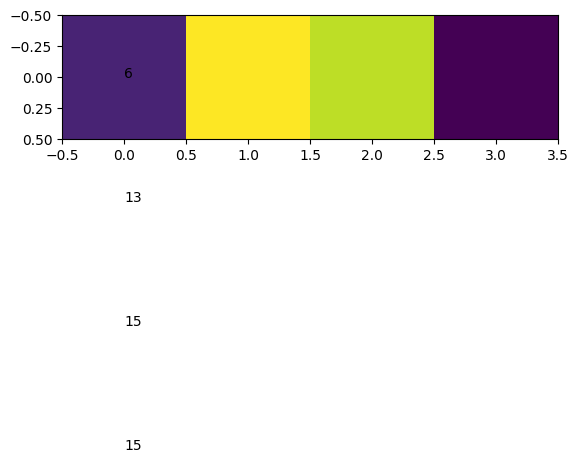

In [ ]:
hitmap = som.activation_response(X)
dist_map = som.distance_map()
plt.imshow(dist_map)
for i in range(W):
    for j in range(H):
        plt.text(i, j, int(hitmap[i, j]));

### SOM plot - TYPE of data points in each neuron

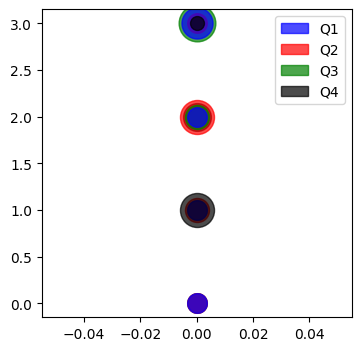

In [ ]:
labels_map = som.labels_map(X, y)
colors = ['blue', 'red', 'green', 'black']
fig = plt.figure(figsize=(4, 4))
for i, j in labels_map:
    for label in labels_map[(i, j)]:
      plt.scatter(i, j, alpha=.7, s=labels_map[(i, j)][label]*100, c=colors[label-1])
import matplotlib.patches as mpatches
legends = [mpatches.Patch(color=c, label=l, alpha=.7) for c, l in zip(colors, target_names)]
plt.legend(handles=legends);

## Which data point was grouped in which neuron

In [ ]:
winner_coordinates = np.array([som.winner(x) for x in X]).T
som_shape = (W,H)
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
for c in np.unique(cluster_index):
     #display(dataset[:].iloc[np.where(cluster_index==c)].drop(['Nombre_apellido', 'Localidad', 'Tareas_cuales','Tareas_tiempo','Plaguicidas_tiempo','Plaguicidas_cuales','Lava_ropa_trabajo','Lava_ropa_frec','Campo_prox_cuanto','Campo_plaguicidas','Campo_apl_forma','Fumiga_frec','Actividad_fisica','Verdura','Fruta','Vitaminas_cuales','Agua_potable','Vaca','Pollo','Cerdo','Hamburguesas','Embutidos','Lacteos_frec','Alcohol_frec','Alcohol_cantidad','Tabaco_actual','Tabaco_diario','Consulta_medico','Controles_anuales_cuales','Enfermedades_diag','Tipo_cancer','HPV','Cancer_familia_tipo','Cancer_familia_interes','Hijos_cuando','Embarazo_inc','Lactancia_tiempo','Anticonceptivos_actual','Anticonceptivos_tiempo','Menopausia_edad','Trabaja_ocupacion','Trabaja_ingresos','Entrego_muestra', 'Glifo_CREAT ug/L CAT','Estacion_año'], axis=1))
     X_ind = np.where(cluster_index==c)
     rows = X[X_ind,:]
     std_rows = np.std(rows, axis=1)

     #------------------------------------------
     col=std_rows<0.21 # <== ACA SE FILTRA PARA QUE MUESTRE PARA CADA NEURONA,
     #SOLAMENTE LAS COLUMNAS QUE FUERON LAS MAS IMPORTANTES PARA ESA NEURONA,
     #las features mas importantss que hicieron que los datos se agrupen en esa neurona
    #------------------------------------------
     print('----------------------------------')
     print(['NEURONA '+ str(c+1)])
     display(DATA[DATA.columns[np.where(col)[1]]].iloc[np.where(cluster_index==c)])
     print('----------------------------------')


----------------------------------
['NEURONA 1']


,Edad,Vive_Sta_Fe_SI_NO,IMC,Vivió_prox_campo,Alcohol,Anticonceptivos,Trabaja,ug Glifosato/ g creatinina
Nro_caso,,,,,,,,
42,45,1,28.5,0,1,1,1,2.649565
43,48,1,22.8,0,1,1,1,1.257694
71,30,1,28.0,0,1,1,1,0.178466
77,31,1,21.7,0,1,1,1,0.194634
81,35,1,21.8,0,1,1,1,0.109025
86,42,1,26.3,0,1,1,1,0.092571


----------------------------------
----------------------------------
['NEURONA 2']


,Edad,Vivió_prox_campo
Nro_caso,,
44,28,0
49,26,0
52,42,0
53,30,0
54,48,0
56,32,0
58,46,0
62,40,0
67,50,0


----------------------------------
----------------------------------
['NEURONA 3']


,Secundaria completa (SI/NO),IMC,ug Glifosato/ g creatinina
Nro_caso,,,
47,0,31.1,1.026936
48,0,26.5,0.161752
55,0,37.3,1.550229
57,0,28.0,0.157295
61,0,28.0,0.200170
68,0,27.0,0.634448
72,0,36.8,0.489516
73,0,34.3,0.539591
74,0,35.1,0.072805


----------------------------------
----------------------------------
['NEURONA 4']


,Edad,Vive_Sta_Fe_SI_NO,Primaria completa (SI/NO),IMC,ug Glifosato/ g creatinina
Nro_caso,,,,,
45,29,0,1,30.4,0.369449
46,38,0,1,20.7,0.207850
50,38,0,1,30.0,0.137993
51,35,0,1,25.0,3.719553
59,51,0,1,25.4,0.567453
60,27,0,1,20.8,0.398447
63,27,0,1,33.3,0.130114
64,24,0,1,30.1,0.417907
65,36,0,1,30.1,0.110558


----------------------------------
